# Data Science Challenge

## Q1 Analysis of sneaker stores
### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
Average order value calculated by computing the arithmetic mean of order amount is $3145.13 which is unusual for sneaker shops. Normally speaking, it's abnormally high for sneaker orders. Therefore, we need to take a close look at the dataset to find out the problem. 

In [44]:
# Data collection 
import pandas as pd
df = pd.read_csv("./data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


## Problem

In the top 20 rows, we see an abnormal entries. The 16th order has 2000 items which is unusual for a single customer. The order amount of that order is $704000 which could the reason why the average order value is unnaturally high. Let's dig down a bit deeper with this observation.
 

In [45]:
df.sort_values(by=['total_items', 'created_at'], ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00



From the table above, it's easy to observe that there are 17 abnormal orders operated by a same user in same shop with 2000 items each. Moreover, when we look at the times where the orders were placed, they were all created in March 2017. It is suspicious to have dozens of large orders of more than thousand of items placed by same user in a relatively short length of time. These orders would obviously elevate the average order value when we compute the arithmetic mean of order amounts. 

In the given context, each shop is selling only one model of sneakers. The user was buying the sneakers from shop 42 at $352 each, which is relatively expensive for sneakers. It is possible that the user was stocking up this specific model to raise the price and sell. 

Let's check the distribution of the order amounts to see the impact of large values

<AxesSubplot:ylabel='Frequency'>

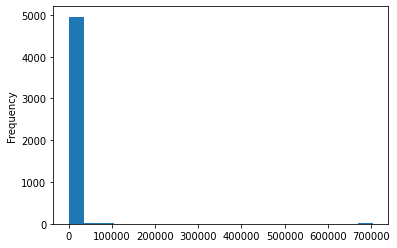

In [51]:
df["order_amount"].plot.hist(bins=20)

The above histogram is not very helpful since most of data are below 1000 but the outliers makes a large range, so it's very difficult to analyze the data with histogram. I will use boxplot to show the range of order amount and outliers.

<AxesSubplot:>

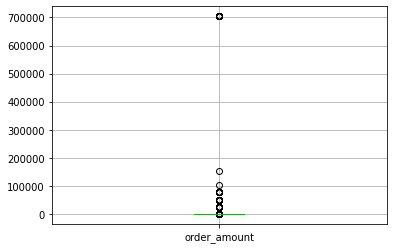

In [47]:
df.boxplot(column="order_amount")

The boxplot shows again the outliers are far away from the central data which deviate the average order value to a much larger value. However, when I look at the graph, it seems that besides the 704000 that I have evaluated previously, there are also some values above 100000. 

In [48]:
df.groupby(by=['order_amount', 'shop_id', 'total_items']).size().reset_index(name='size').sort_values(by='order_amount', ascending=False).head(10)

,order_amount,shop_id,total_items,size
456,704000,42,2000,17
455,154350,78,6,1
454,102900,78,4,1
453,77175,78,3,9
452,51450,78,2,16
451,25725,78,1,19
450,1760,42,5,1
449,1408,42,4,2
448,1086,43,6,1
447,1064,54,8,1


### b. What metric would you report for this dataset? 
From the above table, we can see that although there are some large amount purchase, the high amount is associate with the product price rather than the number of items. As the price of sneakers should be considered into the AOV, they are not outliers we want to exclude or suspect to be scalping. So, it comes to the question "What metric should be used ?" I think median is in this case better than average to represent the the general order values because there are too many large outliers. 

<AxesSubplot:>

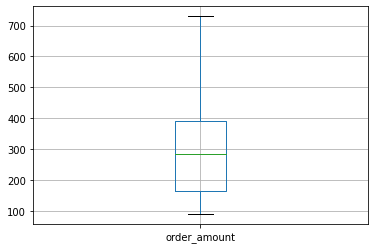

In [49]:
df.boxplot(column="order_amount", showfliers=False)

The above boxplot shows only data within 25 and 75 percentiles. So we can finally see the median and distribution of data. From the graph, 75% of data are below 400 and the median is below 300$, which corresponds to my initial hypothesis. Therefore, as I mentioned before, the median is in this case more representive of the distribution of the data while the mean is elevated by the outliers that are extremely far from the distribution. Althought not shown, the above graph still contains the suspicious data 704000. So, I will eliminate them from the dataset.

### c. What is its value?

In [50]:
new_df = df.loc[df["order_amount"] != 704000]
print(new_df["order_amount"].median())

284.0


## Q2 SQL